In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


# **1. Exploratory Data Analysis :**

In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv('train.csv')

# Display the first 5 rows
df.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [ ]:
# Check the shape (number of rows and columns)
print("Shape of the data:", df.shape)

# Check column names and data types
print("\nData types:")
print(df.dtypes)

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

Shape of the data: (32769, 10)

Data types:
ACTION              int64
RESOURCE            int64
MGR_ID              int64
ROLE_ROLLUP_1       int64
ROLE_ROLLUP_2       int64
ROLE_DEPTNAME       int64
ROLE_TITLE          int64
ROLE_FAMILY_DESC    int64
ROLE_FAMILY         int64
ROLE_CODE           int64
dtype: object

Missing values per column:
ACTION              0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64


Interpretation of results :

No missing values

In [ ]:
# Number of unique values per column
print("Unique values per column:")
print(df.nunique())

Unique values per column:
ACTION                 2
RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64


ACTION
1    30872
0     1897
Name: count, dtype: int64


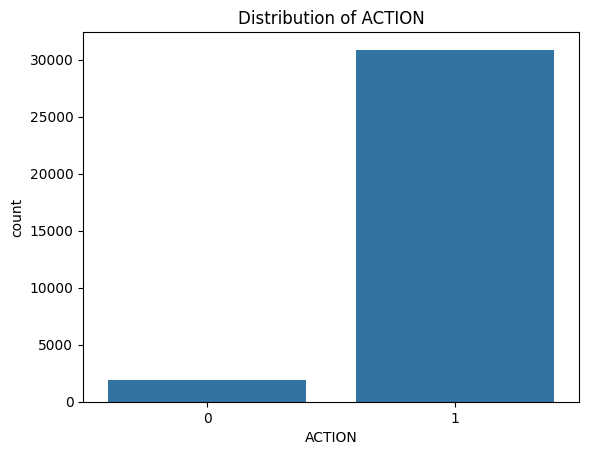

In [ ]:
print(df["ACTION"].value_counts())

import matplotlib.pyplot as plt
import seaborn as sns

# Example: Plot distribution of 'ACTION' (if binary)
if 'ACTION' in df.columns:
    sns.countplot(x='ACTION', data=df)
    plt.title("Distribution of ACTION")
    plt.show()

Data is very imbalanced

In [ ]:
# Describe numerical columns (if any)
print("Summary statistics for numerical columns:")
print(df.describe())

Summary statistics for numerical columns:
             ACTION       RESOURCE         MGR_ID  ROLE_ROLLUP_1  \
count  32769.000000   32769.000000   32769.000000   32769.000000   
mean       0.942110   42923.916171   25988.957979  116952.627788   
std        0.233539   34173.892702   35928.031650   10875.563591   
min        0.000000       0.000000      25.000000    4292.000000   
25%        1.000000   20299.000000    4566.000000  117961.000000   
50%        1.000000   35376.000000   13545.000000  117961.000000   
75%        1.000000   74189.000000   42034.000000  117961.000000   
max        1.000000  312153.000000  311696.000000  311178.000000   

       ROLE_ROLLUP_2  ROLE_DEPTNAME     ROLE_TITLE  ROLE_FAMILY_DESC  \
count   32769.000000   32769.000000   32769.000000      32769.000000   
mean   118301.823156  118912.779914  125916.152644     170178.369648   
std      4551.588572   18961.322917   31036.465825      69509.462130   
min     23779.000000    4674.000000  117879.000000       

# **Train-Test Splitting :**

In [ ]:
X = df.drop(columns=["ACTION"])  # Features
y = df["ACTION"]                # Target

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (26215, 9) Test shape: (6554, 9)


# **Encoding :**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
import numpy as np
from sklearn.model_selection import train_test_split

# --- Encoding Strategy ---
# 1. One-Hot Encode low-cardinality columns (<100 unique values)
onehot_cols = ["ROLE_ROLLUP_1", "ROLE_ROLLUP_2", "ROLE_FAMILY"]
ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
X_train_ohe = ohe.fit_transform(X_train[onehot_cols])
X_test_ohe = ohe.transform(X_test[onehot_cols])

# 2. Target Encode medium-to-high-cardinality columns
# (Columns with 100-1000 unique values)
target_cols = ["RESOURCE", "MGR_ID", "ROLE_DEPTNAME",
               "ROLE_TITLE", "ROLE_FAMILY_DESC", "ROLE_CODE"]
target_encoder = TargetEncoder(cols=target_cols)
X_train_target = target_encoder.fit_transform(X_train[target_cols], y_train)
X_test_target = target_encoder.transform(X_test[target_cols])

# Combine all features
X_train_encoded = np.hstack([X_train_ohe, X_train_target])
X_test_encoded = np.hstack([X_test_ohe, X_test_target])

# **Modeling with RF and balancing using SMOTE and Undersampling**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'model__max_depth': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 200}

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.41      0.38       379
           1       0.96      0.95      0.96      6175

    accuracy                           0.92      6554
   macro avg       0.66      0.68      0.67      6554
weighted avg       0.93      0.92      0.92      6554



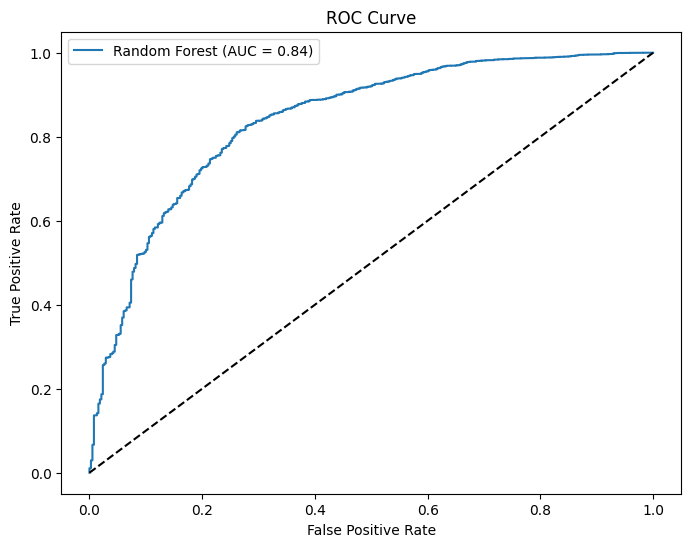

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 1. Balance the data using SMOTE + Undersampling
smote = SMOTE(random_state=42)
under = RandomUnderSampler(random_state=42)

# 2. Define the model with class_weight='balanced'
model = RandomForestClassifier(random_state=42, class_weight='balanced')

# 3. Create pipeline with resampling and model
pipeline = Pipeline([
    ('smote', smote),
    ('under', under),
    ('model', model)
])

# 4. Hyperparameter tuning
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# 5. Fit the model
grid_search.fit(X_train_encoded, y_train)

# 6. Get best model
best_model = grid_search.best_estimator_

# 7. Evaluate on test set
y_pred = best_model.predict(X_test_encoded)
y_proba = best_model.predict_proba(X_test_encoded)[:, 1]  # Probabilities for class 1

# 8. Print results
print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 9. Calculate and plot ROC AUC
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# **Modeling RF and balancing with ADASYN :**

=== ADASYN Results ===
              precision    recall  f1-score   support

           0       0.40      0.37      0.39       379
           1       0.96      0.97      0.96      6175

    accuracy                           0.93      6554
   macro avg       0.68      0.67      0.67      6554
weighted avg       0.93      0.93      0.93      6554

ROC AUC: 0.8189708694305278


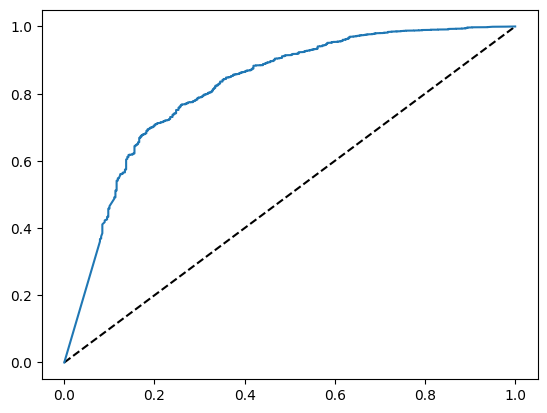

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# ADASYN Pipeline
adasyn_pipeline = Pipeline([
    ('adasyn', ADASYN(random_state=42)),
    ('model', RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        min_samples_split=5,
        min_samples_leaf=1,
        class_weight='balanced',
        random_state=42
    ))
])

# Fit and evaluate
adasyn_pipeline.fit(X_train_encoded, y_train)
y_pred_adasyn = adasyn_pipeline.predict(X_test_encoded)
y_proba_adasyn = adasyn_pipeline.predict_proba(X_test_encoded)[:, 1]

# Metrics
print("=== ADASYN Results ===")
print(classification_report(y_test, y_pred_adasyn))
print("ROC AUC:", roc_auc_score(y_test, y_proba_adasyn))

# ROC Curve
fpr_adasyn, tpr_adasyn, _ = roc_curve(y_test, y_proba_adasyn)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_adasyn, tpr_adasyn, label=f'ADASYN (AUC = {roc_auc_score(y_test, y_proba_adasyn):.2f}')

# **Modeling with RF and balancing with OverSampling**


=== Oversampling (Duplication) Results ===
              precision    recall  f1-score   support

           0       0.44      0.27      0.34       379
           1       0.96      0.98      0.97      6175

    accuracy                           0.94      6554
   macro avg       0.70      0.63      0.65      6554
weighted avg       0.93      0.94      0.93      6554

ROC AUC: 0.8135944793992287


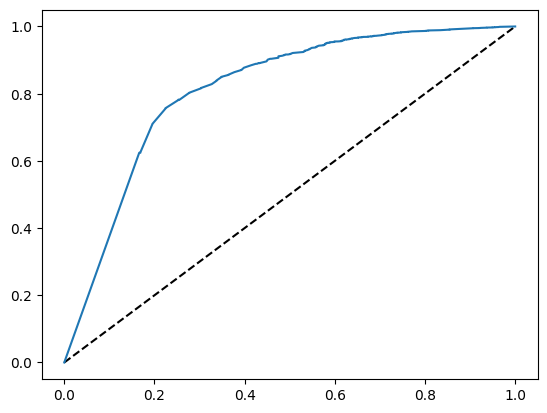

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Oversampling Pipeline
over_pipeline = Pipeline([
    ('oversample', RandomOverSampler(random_state=42)),
    ('model', RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        min_samples_split=5,
        min_samples_leaf=1,
        class_weight='balanced',
        random_state=42
    ))
])

# Fit and evaluate
over_pipeline.fit(X_train_encoded, y_train)
y_pred_over = over_pipeline.predict(X_test_encoded)
y_proba_over = over_pipeline.predict_proba(X_test_encoded)[:, 1]

# Metrics
print("\n=== Oversampling (Duplication) Results ===")
print(classification_report(y_test, y_pred_over))
print("ROC AUC:", roc_auc_score(y_test, y_proba_over))

# ROC Curve
fpr_over, tpr_over, _ = roc_curve(y_test, y_proba_over)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_over, tpr_over, label=f'Oversampling (AUC = {roc_auc_score(y_test, y_proba_over):.2f}')

# **Modeling with RF and balancing with Undersampling**


=== Undersampling Results ===
              precision    recall  f1-score   support

           0       0.25      0.54      0.35       379
           1       0.97      0.90      0.94      6175

    accuracy                           0.88      6554
   macro avg       0.61      0.72      0.64      6554
weighted avg       0.93      0.88      0.90      6554

ROC AUC: 0.8298208582141369


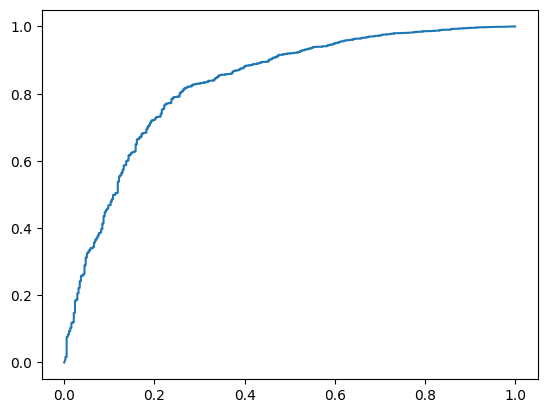

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Undersampling Pipeline
under_pipeline = Pipeline([
    ('undersample', RandomUnderSampler(random_state=42)),
    ('model', RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        min_samples_split=5,
        min_samples_leaf=1,
        class_weight='balanced',
        random_state=42
    ))
])

# Fit and evaluate
under_pipeline.fit(X_train_encoded, y_train)
y_pred_under = under_pipeline.predict(X_test_encoded)
y_proba_under = under_pipeline.predict_proba(X_test_encoded)[:, 1]

# Metrics
print("\n=== Undersampling Results ===")
print(classification_report(y_test, y_pred_under))
print("ROC AUC:", roc_auc_score(y_test, y_proba_under))

# ROC Curve
fpr_under, tpr_under, _ = roc_curve(y_test, y_proba_under)
plt.plot(fpr_under, tpr_under, label=f'Undersampling (AUC = {roc_auc_score(y_test, y_proba_under):.2f}')

# **. KFold encoding with RF using several sample startegies (smote , adasyn , oversampling** **, undersampling** **,SMOTETOMEK**

In [ ]:
!pip install category_encoders

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, RocCurveDisplay
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from category_encoders import TargetEncoder

In [ ]:
df = pd.read_csv('train.csv')
X = df.drop(columns=['ACTION'])
y = df['ACTION']

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
X_encoded = pd.DataFrame(index=X.index, columns=X.columns)

for col in X.columns:
    for train_idx, val_idx in kf.split(X):
        X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
        y_train_fold = y.iloc[train_idx]
        encoder = TargetEncoder(cols=[col])
        encoder.fit(X_train_fold[[col]], y_train_fold)
        X_encoded.loc[val_idx, col] = encoder.transform(X_val_fold[[col]])[col].values

X_encoded = X_encoded.astype(float)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
sampling_strategies = {
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'RandomUnderSampler': RandomUnderSampler(random_state=42),
    'SMOTETomek': SMOTETomek(random_state=42)
}

In [ ]:
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'orange', 'red', 'purple']

<Figure size 1000x800 with 0 Axes>


===== SMOTE =====
ROC AUC: 0.8613
              precision    recall  f1-score   support

           0       0.24      0.72      0.36       379
           1       0.98      0.86      0.92      6175

    accuracy                           0.85      6554
   macro avg       0.61      0.79      0.64      6554
weighted avg       0.94      0.85      0.89      6554


===== ADASYN =====
ROC AUC: 0.8582
              precision    recall  f1-score   support

           0       0.20      0.78      0.32       379
           1       0.98      0.81      0.89      6175

    accuracy                           0.81      6554
   macro avg       0.59      0.79      0.60      6554
weighted avg       0.94      0.81      0.85      6554


===== RandomOverSampler =====
ROC AUC: 0.8571
              precision    recall  f1-score   support

           0       0.24      0.73      0.36       379
           1       0.98      0.86      0.91      6175

    accuracy                           0.85      6554
   macro a

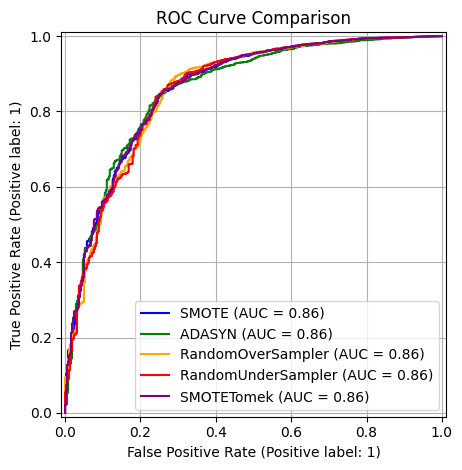

In [ ]:
for i, (name, sampler) in enumerate(sampling_strategies.items()):
    print(f"\n===== {name} =====")

    model = Pipeline([
        ('sampler', sampler),
        ('rf', RandomForestClassifier(
            n_estimators=200,
            max_depth=5,
            min_samples_split=5,
            min_samples_leaf=1,
            class_weight='balanced',
            random_state=42,
            n_jobs=-1
        ))
    ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC AUC: {roc_auc:.4f}")
    print(classification_report(y_test, y_pred))
    RocCurveDisplay.from_predictions(y_test, y_proba, name=name, color=colors[i], ax=plt.gca())

plt.title("ROC Curve Comparison")
plt.grid(True)
plt.tight_layout()
plt.show()


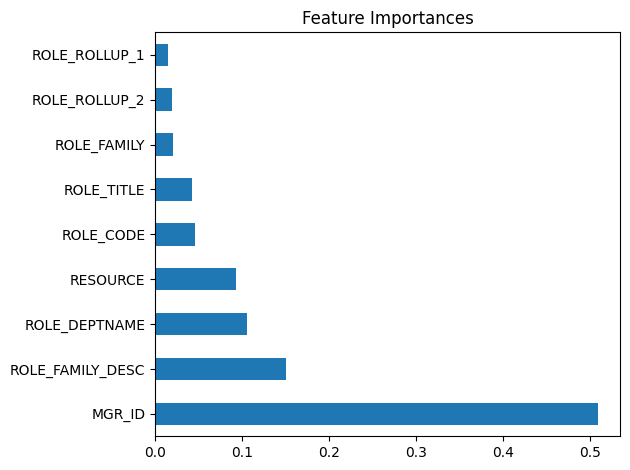

In [ ]:
importances = model.named_steps['rf'].feature_importances_
pd.Series(importances, index=X.columns).sort_values(ascending=False).plot.barh()
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

# **. KFold encoding with LGB and XGB using several sample startegies (smote , adasyn , oversampling** **, undersampling** **,SMOTETOMEK**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import roc_auc_score, classification_report, RocCurveDisplay, accuracy_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from category_encoders import TargetEncoder
import lightgbm as lgb
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [ ]:
df = pd.read_csv('train.csv')
X = df.drop(columns=['ACTION'])
y = df['ACTION']

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
X_encoded = pd.DataFrame(index=X.index, columns=X.columns)

for col in X.columns:
    for train_idx, val_idx in kf.split(X):
        X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
        y_train_fold = y.iloc[train_idx]
        encoder = TargetEncoder(cols=[col])
        encoder.fit(X_train_fold[[col]], y_train_fold)
        X_encoded.loc[val_idx, col] = encoder.transform(X_val_fold[[col]])[col].values

X_encoded = X_encoded.astype(float)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)
pos_ratio = y_train.value_counts()[0] / y_train.value_counts()[1]

In [ ]:
sampling_strategies = {
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'RandomUnderSampler': RandomUnderSampler(random_state=42),
    'SMOTETomek': SMOTETomek(random_state=42)
}

In [ ]:
plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'orange', 'red', 'purple']
results = pd.DataFrame(columns=['Model', 'Sampler', 'Train Accuracy', 'Test Accuracy', 'Train AUC', 'Test AUC'])

<Figure size 1200x800 with 0 Axes>


===== Sampling: SMOTE =====
[LightGBM] [Info] Number of positive: 24697, number of negative: 24697
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.053197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 49394, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

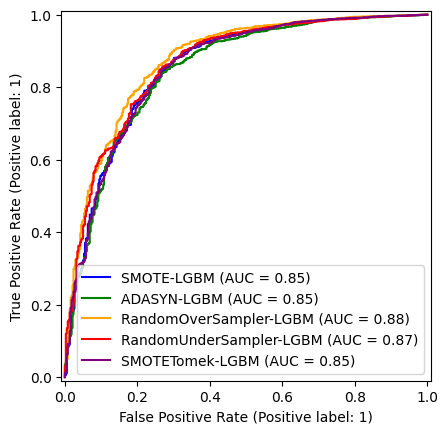

In [ ]:
for i, (sampler_name, sampler) in enumerate(sampling_strategies.items()):
    print(f"\n===== Sampling: {sampler_name} =====")

    lgb_model = Pipeline([
        ('sampler', sampler),
        ('clf', lgb.LGBMClassifier(
            n_estimators=200,
            max_depth=5,
            learning_rate=0.05,
            class_weight='balanced',
            random_state=42,
            n_jobs=-1
        ))
    ])

    lgb_model.fit(X_train, y_train)
    y_train_pred_lgb = lgb_model.predict(X_train)
    y_train_proba_lgb = lgb_model.predict_proba(X_train)[:, 1]
    y_pred_lgb = lgb_model.predict(X_test)
    y_proba_lgb = lgb_model.predict_proba(X_test)[:, 1]

    train_acc_lgb = accuracy_score(y_train, y_train_pred_lgb)
    test_acc_lgb = accuracy_score(y_test, y_pred_lgb)
    train_auc_lgb = roc_auc_score(y_train, y_train_proba_lgb)
    test_auc_lgb = roc_auc_score(y_test, y_proba_lgb)

    results.loc[len(results)] = ['LightGBM', sampler_name, train_acc_lgb, test_acc_lgb, train_auc_lgb, test_auc_lgb]

    print(f"[LightGBM] Train Accuracy: {train_acc_lgb:.4f}, Test Accuracy: {test_acc_lgb:.4f}")
    print(f"[LightGBM] Train AUC: {train_auc_lgb:.4f}, Test AUC: {test_auc_lgb:.4f}")
    print(classification_report(y_test, y_pred_lgb))
    RocCurveDisplay.from_predictions(y_test, y_proba_lgb, name=f"{sampler_name}-LGBM", color=colors[i], ax=plt.gca())

[XGBoost] Train Accuracy: 0.5384, Test Accuracy: 0.5352
[XGBoost] Train AUC: 0.9086, Test AUC: 0.8607
              precision    recall  f1-score   support

           0       0.10      0.92      0.19       379
           1       0.99      0.51      0.67      6175

    accuracy                           0.54      6554
   macro avg       0.55      0.71      0.43      6554
weighted avg       0.94      0.54      0.65      6554

[XGBoost] Train Accuracy: 0.4890, Test Accuracy: 0.4776
[XGBoost] Train AUC: 0.9052, Test AUC: 0.8543
              precision    recall  f1-score   support

           0       0.09      0.93      0.17       379
           1       0.99      0.45      0.62      6175

    accuracy                           0.48      6554
   macro avg       0.54      0.69      0.39      6554
weighted avg       0.94      0.48      0.59      6554

[XGBoost] Train Accuracy: 0.4074, Test Accuracy: 0.3956
[XGBoost] Train AUC: 0.9386, Test AUC: 0.8679
              precision    recall  f1-sc

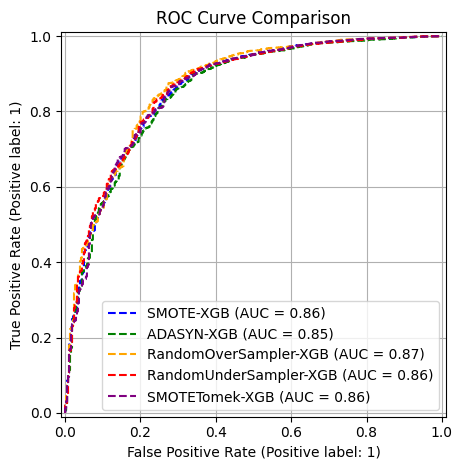

In [ ]:
for i, (sampler_name, sampler) in enumerate(sampling_strategies.items()):
    xgb_model = Pipeline([
        ('sampler', sampler),
        ('clf', xgb.XGBClassifier(
            n_estimators=200,
            max_depth=5,
            learning_rate=0.05,
            scale_pos_weight=pos_ratio,
            use_label_encoder=False,
            eval_metric='logloss',
            random_state=42,
            n_jobs=-1
        ))
    ])

    xgb_model.fit(X_train, y_train)
    y_train_pred_xgb = xgb_model.predict(X_train)
    y_train_proba_xgb = xgb_model.predict_proba(X_train)[:, 1]
    y_pred_xgb = xgb_model.predict(X_test)
    y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

    train_acc_xgb = accuracy_score(y_train, y_train_pred_xgb)
    test_acc_xgb = accuracy_score(y_test, y_pred_xgb)
    train_auc_xgb = roc_auc_score(y_train, y_train_proba_xgb)
    test_auc_xgb = roc_auc_score(y_test, y_proba_xgb)

    results.loc[len(results)] = ['XGBoost', sampler_name, train_acc_xgb, test_acc_xgb, train_auc_xgb, test_auc_xgb]

    print(f"[XGBoost] Train Accuracy: {train_acc_xgb:.4f}, Test Accuracy: {test_acc_xgb:.4f}")
    print(f"[XGBoost] Train AUC: {train_auc_xgb:.4f}, Test AUC: {test_auc_xgb:.4f}")
    print(classification_report(y_test, y_pred_xgb))
    RocCurveDisplay.from_predictions(y_test, y_proba_xgb, name=f"{sampler_name}-XGB", linestyle='--', color=colors[i], ax=plt.gca())

plt.title("ROC Curve Comparison")
plt.grid(True)
plt.tight_layout()
plt.show()


===== Summary of Results =====
      Model             Sampler  Train Accuracy  Test Accuracy  Train AUC  \
0  LightGBM               SMOTE        0.911234       0.903570   0.904674   
1  LightGBM              ADASYN        0.902460       0.890601   0.899373   
2  LightGBM   RandomOverSampler        0.888957       0.869393   0.946908   
3  LightGBM  RandomUnderSampler        0.841083       0.827128   0.918733   
4  LightGBM          SMOTETomek        0.912645       0.903418   0.903440   
5   XGBoost               SMOTE        0.538356       0.535246   0.908637   
6   XGBoost              ADASYN        0.488995       0.477571   0.905224   
7   XGBoost   RandomOverSampler        0.407362       0.395636   0.938634   
8   XGBoost  RandomUnderSampler        0.228648       0.224901   0.905253   
9   XGBoost          SMOTETomek        0.542972       0.532652   0.910719   

   Test AUC  
0  0.854959  
1  0.848275  
2  0.875299  
3  0.865218  
4  0.854730  
5  0.860700  
6  0.854267  
7  0.867

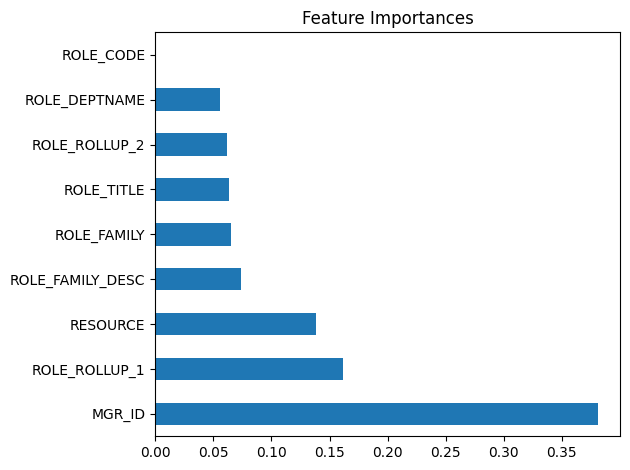

In [ ]:
print("\n===== Summary of Results =====")
print(results)

importances = xgb_model.named_steps['clf'].feature_importances_
pd.Series(importances, index=X.columns).sort_values(ascending=False).plot.barh()
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

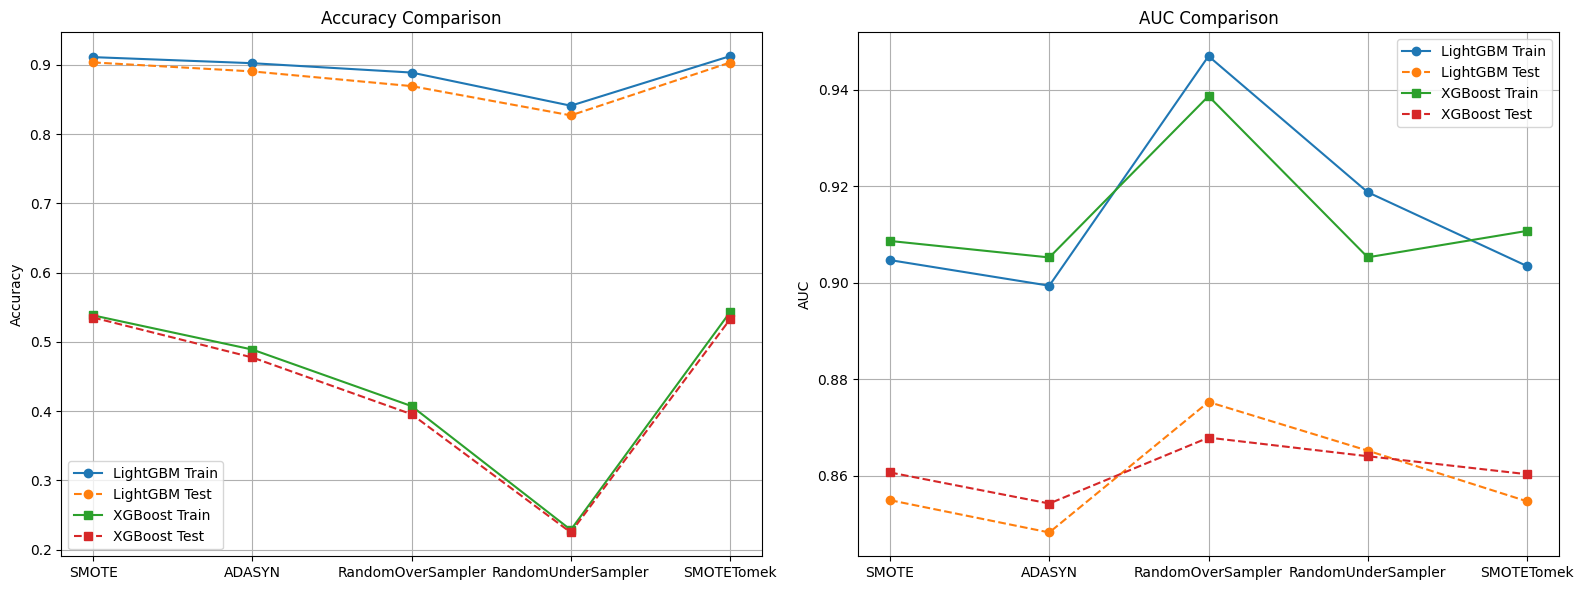

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

lgb_results = results[results['Model'] == 'LightGBM']
xgb_results = results[results['Model'] == 'XGBoost']

ax1.plot(lgb_results['Sampler'], lgb_results['Train Accuracy'], 'o-', label='LightGBM Train')
ax1.plot(lgb_results['Sampler'], lgb_results['Test Accuracy'], 'o--', label='LightGBM Test')
ax1.plot(xgb_results['Sampler'], xgb_results['Train Accuracy'], 's-', label='XGBoost Train')
ax1.plot(xgb_results['Sampler'], xgb_results['Test Accuracy'], 's--', label='XGBoost Test')
ax1.set_title('Accuracy Comparison')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

ax2.plot(lgb_results['Sampler'], lgb_results['Train AUC'], 'o-', label='LightGBM Train')
ax2.plot(lgb_results['Sampler'], lgb_results['Test AUC'], 'o--', label='LightGBM Test')
ax2.plot(xgb_results['Sampler'], xgb_results['Train AUC'], 's-', label='XGBoost Train')
ax2.plot(xgb_results['Sampler'], xgb_results['Test AUC'], 's--', label='XGBoost Test')
ax2.set_title('AUC Comparison')
ax2.set_ylabel('AUC')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()